# Lendo dados de geociência

## License

All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

## Imports

Coloque **todos** os `import` na célula abaixo. Não se esqueça do `%matplotlib inline` para que os gráficos apareçam no notebook.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## IMPORTANTE

Agora que vocês sabem técnicas de programação defensiva, eu espero que todo o código que vocês fizerem abaixo utilizem essas técnicas. Crie docstrings para suas funções, cheque as entradas (quando for possível) e cheque as saídas. **Não esqueçam dos comentários**.

## Temperatura no Rio de Janeiro

O arquivo `data/23.31S-42.82W-TAVG-Trend.txt` contém dados de temperatura média mensal para a cidade do Rio de Janeiro. O arquivo também contém médias móveis anual, 5, 10 e 20 anos. Esses dados foram baixados do site Berkeley Earth (http://berkeleyearth.lbl.gov/locations/23.31S-42.82W).

### Tarefa

Faça duas funções, uma que lê os dados de temperatura mensal, outra que lê os dados da média móvel anual.
As duas funções devem:

* Receber como entrada **somente** o nome do arquivo de dados.
* Retornar duas listas: uma com as datas referentes aos dados e outra com os dados de temperatura.
* As datas retornadas devem ser em anos decimais. Ex: Janeiro de 1984 seria 1984.0833333333333 (1984 + 1/12).
* Datas sem valores de temperatura (NaN) devem ser ignoradas (não incluidas nas listas).

Utilize suas funções para carregar os dados e fazer um gráfico da temperatura média mensal e média movel anual pelo tempo.

In [56]:
arquivo = open('data/23.31S-42.82W-TAVG-Trend.txt')
linha = arquivo.readline()
data_mensal = []
temperatura_mensal = []
for linha in arquivo:
    if linha[0] != '%':
        a = linha.split()
        if a != []:
            linha_float = []
            for i in a:
                if i != 'NaN':
                    f = float(i)
                    linha_float.append(f)
            if len(linha_float) > 2: 
                dat = []
                for i in range(2):
                    dat.append(linha_float[i])
                data_certa = dat[0] + (dat[1]/12)
                data_mensal.append(data_certa)
                temperatura_mensal.append(linha_float[2] + 24.01)

In [59]:
len(temperatura_mensal)

2096

In [60]:
arquivo = open('data/23.31S-42.82W-TAVG-Trend.txt')
linha = arquivo.readline()
data_anual = []
temperatura_anual = []
for linha in arquivo:
    if linha[0] != '%':
        a = linha.split()
        if a != []:
            linha_float = []
            for i in a:
                if i != 'NaN':
                    f = float(i)
                    linha_float.append(f)
            if len(linha_float) > 4: 
                dat = []
                for i in range(2):
                    dat.append(linha_float[i])
                data_certa = dat[0] + (dat[1]/12)
                data_anual.append(data_certa)
                temperatura_anual.append(linha_float[4] + 24.01)

In [68]:
print(data_anual)

[1832.25, 1832.3333333333333, 1832.4166666666667, 1832.5, 1832.5833333333333, 1832.6666666666667, 1832.75, 1832.8333333333333, 1832.9166666666667, 1833.0, 1833.0833333333333, 1833.1666666666667, 1833.25, 1833.3333333333333, 1833.4166666666667, 1833.5, 1833.5833333333333, 1833.6666666666667, 1833.75, 1833.8333333333333, 1833.9166666666667, 1834.0, 1834.0833333333333, 1834.1666666666667, 1834.25, 1834.3333333333333, 1834.4166666666667, 1834.5, 1834.5833333333333, 1834.6666666666667, 1834.75, 1834.8333333333333, 1834.9166666666667, 1835.0, 1835.0833333333333, 1835.1666666666667, 1835.25, 1835.3333333333333, 1835.4166666666667, 1835.5, 1835.5833333333333, 1835.6666666666667, 1835.75, 1835.8333333333333, 1835.9166666666667, 1836.0, 1836.0833333333333, 1836.1666666666667, 1836.25, 1836.3333333333333, 1836.4166666666667, 1836.5, 1836.5833333333333, 1836.6666666666667, 1836.75, 1836.8333333333333, 1836.9166666666667, 1837.0, 1837.0833333333333, 1837.1666666666667, 1837.25, 1837.3333333333333, 

In [11]:
t = teste.split()
print(t)

['1855', '12', '-1.397', '2.170', '-0.690', '0.567', '-0.499', '0.342', '-0.577', '0.376', '-0.706', '0.315']


In [12]:
t = teste.split()
valores = []
for i in t:
    if i != 'NaN':
        f = float(i)
        valores.append(f)
print(valores)

[1855.0, 12.0, -1.397, 2.17, -0.69, 0.567, -0.499, 0.342, -0.577, 0.376, -0.706, 0.315]


In [14]:
data = []
for i in range(2):
    data.append(valores[i])
data_certa = data[0] + (data[1]/12)
print(data_certa)

1856.0


In [16]:
temperatura = []
for i in range(2, len(valores)):
    if i != 3 and i < 5:
        temperatura.append(valores[i])
print(temperatura)

[-1.397, -0.69]


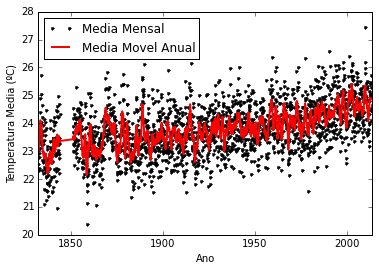

In [73]:
plt.figure()
plt.plot(data_mensal, temperatura_mensal, '.k', label = 'Media Mensal')
plt.plot(data_anual, temperatura_anual, '-r', label = 'Media Movel Anual', linewidth = 2)
plt.xlabel('Ano')
plt.xlim(1832, 2014)
plt.ylabel('Temperatura Media (ºC)')
plt.ylim(20, 28)
plt.legend(loc='upper left', fontsize='large')

### Resultado esperado

O gráfico final deve ser parecido com o abaixo:

![images/media-mensal-temp-rio.png](images/media-mensal-temp-rio.png)

### Tarefa

Faça uma função que calcule a temperatura média anual a partir das temperaturas mensais. A sua função deve:

* Receber como entrada a lista das datas e a lista das temperaturas mensais.
* Retornar duas listas: uma com os anos e outra com as temperaturas médias correspondetes.
* Anos que não contem dados de todos os 12 meses devem ser ignorados (não incluídos nas listas retornadas).

Utilize sua função para calcular a média anual. Faça um gráfico da temperatura média anual por ano junto com a média móvel anual.

**Dica**: A função `math.floor` retorna o número inteiro que precede um número real. Ex: `math.floor(1984.23) == 1984`

### Resultado esperado

O gráfico final deve ser parecido com o abaixo:

![images/media-anual-temp-rio.png](images/media-anual-temp-rio.png)

## Tarefa Bônus

Salve os dados da média anual em um arquivo CSV (comma separated values) chamado `temp-media-anual.csv`. Os valores devem ser separados por `,`. A primeira coluna deve conter os anos e a segunda as temperaturas. Esse arquivo deve estar presente em seu repositório (dê `git add` nele).